In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import erf

In [2]:
def reference(n,x):
    return 1-(erf(np.sqrt(np.pi/2)/(2*x)))**(2*n)

def y_err(p,NUM_ERR, NUM_MAX):
    ar=[int(NUM_ERR/(p+1e-9)),int(NUM_MAX)]
    #print([int(NUM_ERR/(p+1e-12)),int(NUM_MAX)])
    
    N_tot=min(ar)
    
    return p*(1-p)#/N_tot

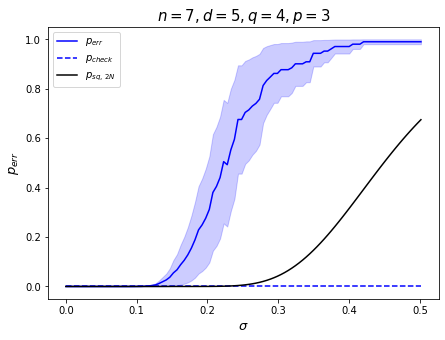

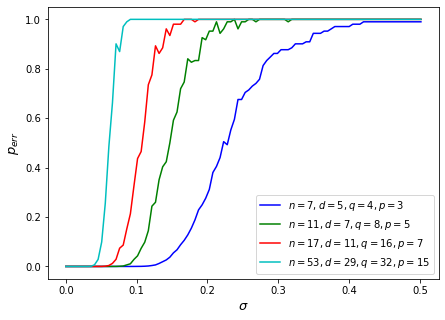

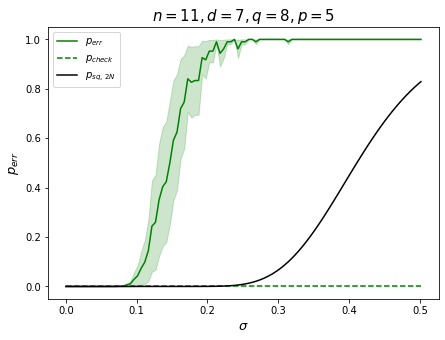

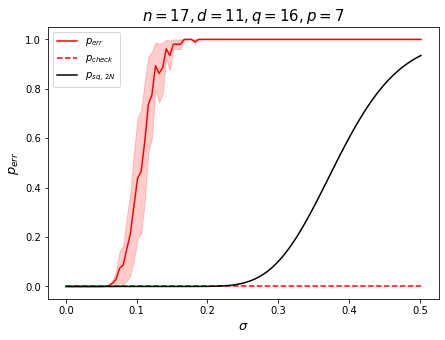

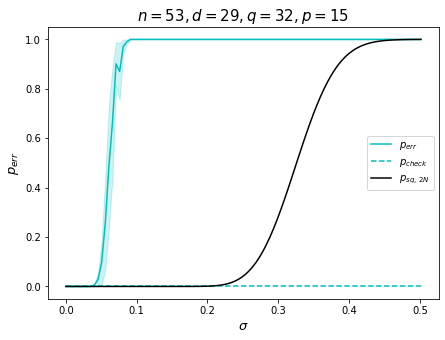

In [3]:
Ps=[[3],[5],[7],[3,5],[3,7]]
Qs=[4,8,16,32,64]
Ns=[7,11,17,53, 97]
Ds=[5,7,11,29,53]
cols=['b','g','r','c']
NUM_ERR=int(100)
NUM_MAX=int(1e5)


sigmas=np.linspace(1e-7,0.15,100)


for i in range(len(Ns)-1):
    n,q,p,d=Ns[i], Qs[i], np.prod(np.asarray(Ps[i])), Ds[i]
    prefix="opt"
    path="results_new_y"
    Babai=1
    data=np.genfromtxt("%s/NTRU_sim_NTRUDEC_B%i_%s_n%i_q%i_p%i_d%i_NERR%i.txt" % (path, Babai,prefix, n, q, p, d, NUM_ERR))
    
    plt.figure("%i"%(i), figsize=(7,5))
    yerr=[y_err(p,NUM_ERR,NUM_MAX) for p in data[1]]
    x,y,yerr=np.asarray(data[0]*np.sqrt(2*np.pi)),np.asarray(data[1]),np.asarray(yerr)
    #plt.errorbar(data[0], data[1],yerr=yerr,ecolor='blue', elinewidth=1, capsize=0, label=r'$p_{err}$')
    plt.plot(x,y,label=r'$p_{err}$',color=cols[i])
    plt.fill_between(x, y-yerr, y+yerr,
    alpha=0.2, edgecolor=cols[i], facecolor=cols[i])
    
    plt.plot(data[0]*np.sqrt(2*np.pi), data[2],color=cols[i],linestyle='dashed', label='$p_{check}$')
    #plt.plot(data[0]*np.sqrt(2*np.pi), data[3], label='$p_{Babai}$')
    plt.plot(data[0]*np.sqrt(2*np.pi), reference(n, data[0]*np.sqrt(2*np.pi)),color='k', label='$p_{sq,\, 2N}$')
    plt.title(r"$n=%i,d=%i, q=%i, p=%i$"%(n,d,q,p), fontsize=15)
    plt.legend()
    plt.xlabel(r'$\sigma$', fontsize=13)
    plt.ylabel(r'$p_{err}$', fontsize=13)
    
    plt.savefig("%s/NTRU_sim_NTRUDEC_B%i_%s_n%i_q%i_p%i_d%i_NERR%i.pdf" % ("plots", Babai,prefix, n, q, p, d, NUM_ERR))
    #plt.show()
    
    
    
    plt.figure("plotall",figsize=(7,5))
for i in range(len(Ns)-1):
    n,q,p,d=Ns[i], Qs[i], np.prod(np.asarray(Ps[i])), Ds[i]
    prefix="opt"
    path="results_new_y"
    Babai=1
    data=np.genfromtxt("%s/NTRU_sim_NTRUDEC_B%i_%s_n%i_q%i_p%i_d%i_NERR%i.txt" % (path, Babai,prefix, n, q, p, d, NUM_ERR))
    

    plt.plot(data[0]*np.sqrt(2*np.pi), data[1],color=cols[i], label=r"$n=%i,d=%i, q=%i, p=%i$"%(n,d,q,p))


plt.legend()
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel(r'$\sigma$', fontsize=13)
plt.ylabel(r'$p_{err}$', fontsize=13)
#plt.xlim(0,0.1)
#plt.ylim(0,0.005)
#plt.show()
plt.savefig("plots/NTRUDEC_plotall.pdf")

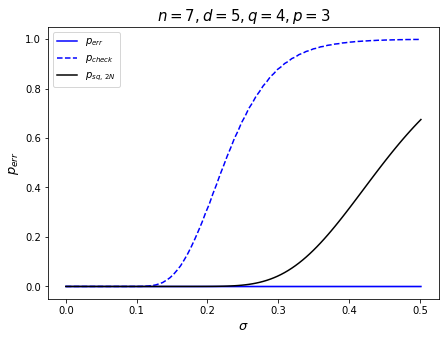

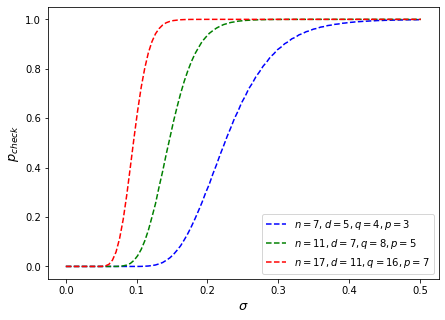

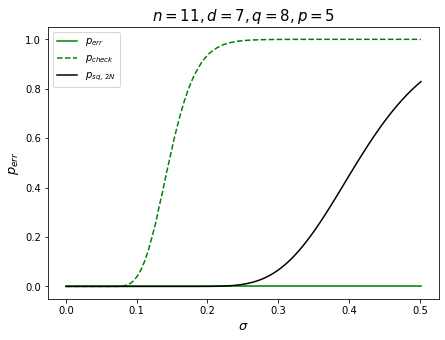

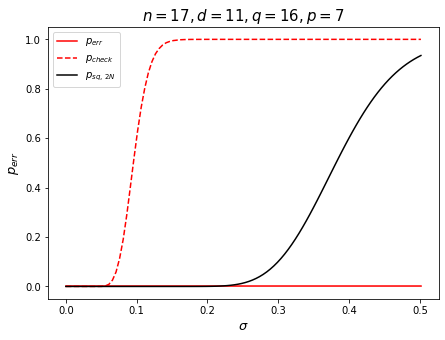

In [4]:
Ps=[[3],[5],[7],[3,5],[3,7]]
Qs=[4,8,16,32,64]
Ns=[7,11,17,53, 97]
Ds=[5,7,11,29,53]
NUM_ERR=int(100)
NUM_MAX=int(1e5)


sigmas=np.linspace(1e-7,0.15,100)


for i in range(len(Ns)-2):
    n,q,p,d=Ns[i], Qs[i], np.prod(np.asarray(Ps[i])), Ds[i]
    prefix="opt"
    path="results_new_y"
    Babai=1
    data=np.genfromtxt("%s/NTRU_sim_BABDEC_B%i_%s_n%i_q%i_p%i_d%i_NERR%i.txt" % (path, Babai,prefix, n, q, p, d, NUM_ERR))
    
    plt.figure("%i"%(i), figsize=(7,5))
    yerr=[y_err(p,NUM_ERR,NUM_MAX) for p in data[1]]
    
    
    x,y,yerr=np.asarray(data[0]*np.sqrt(2*np.pi)),np.asarray(data[1]),np.asarray(yerr)
    #plt.errorbar(data[0], data[1],yerr=yerr,ecolor='blue', elinewidth=1, capsize=0, label=r'$p_{err}$')
    plt.plot(x,y,label=r'$p_{err}$',color=cols[i])
    plt.fill_between(x, y-yerr, y+yerr,alpha=0.2, edgecolor=cols[i], facecolor=cols[i])
  
    plt.plot(data[0]*np.sqrt(2*np.pi), data[2],color=cols[i],linestyle='dashed', label='$p_{check}$')
    #plt.plot(data[0], data[3], label='$p_{Babai}$')
    plt.plot(data[0]*np.sqrt(2*np.pi), reference(n, data[0]*np.sqrt(2*np.pi)),color='k', label='$p_{sq,\, 2N}$')
    plt.title(r"$n=%i,d=%i, q=%i, p=%i$"%(n,d,q,p), fontsize=15)
    plt.legend()
    plt.xlabel(r'$\sigma$', fontsize=13)
    plt.ylabel(r'$p_{err}$', fontsize=13)
    
    plt.savefig("%s/NTRU_sim_BABDEC_B%i_%s_n%i_q%i_p%i_d%i_NERR%i.pdf" % ("plots", Babai,prefix, n, q, p, d, NUM_ERR))
    #plt.show()
    
    
    
    plt.figure("plotall",figsize=(7,5))
for i in range(len(Ns)-2):
    n,q,p,d=Ns[i], Qs[i], np.prod(np.asarray(Ps[i])), Ds[i]
    prefix="opt"
    path="results_new_y"
    Babai=1
    data=np.genfromtxt("%s/NTRU_sim_BABDEC_B%i_%s_n%i_q%i_p%i_d%i_NERR%i.txt" % (path, Babai,prefix, n, q, p, d, NUM_ERR))
    

    plt.plot(data[0]*np.sqrt(2*np.pi), data[2],color=cols[i],linestyle='dashed', label=r"$n=%i,d=%i, q=%i, p=%i$"%(n,d,q,p))


plt.legend()
#plt.xticks(fontsize=20)
#plt.yticks(fontsize=20)
plt.xlabel(r'$\sigma$', fontsize=13)
plt.ylabel(r'$p_{check}$', fontsize=13)
#plt.xlim(0,0.1)
#plt.ylim(0,0.005)
#plt.show()
plt.savefig("plots/BABDEC_plotall.pdf")
